In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # You can choose other ResNet variants like ResNet101, etc.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

# paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 224, 224 # Common input size for ResNet
batch_size = 32

# Create data generators with data augmentation for training and rescaling for testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and test data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model Building

# Load pre-trained ResNet50 model without the top (classification) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) # Reduce spatial dimensions
model.add(Dense(128, activation='relu')) # Add a dense layer for feature learning
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Model Compilation and Training

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs=20, # Adjust as needed
    validation_data=test_generator,
    validation_steps = test_generator.samples // batch_size
)

# Model Evaluation

loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Epoch 1/20


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.5845 - loss: 0.6782 - val_accuracy: 0.6562 - val_loss: 0.5804
Epoch 2/20
 1/53 ━━━━━━━━━━━━━━━━━━━━ 1:45 2s/step - accuracy: 0.5625 - loss: 0.6688

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5625 - loss: 0.6688 - val_accuracy: 0.5000 - val_loss: 0.6564
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 288s 5s/step - accuracy: 0.6492 - loss: 0.6133 - val_accuracy: 0.7163 - val_loss: 0.5655
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.7812 - loss: 0.5912 - val_accuracy: 0.6875 - val_loss: 0.6069
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step - accuracy: 0.6737 - loss: 0.5775 - val_accuracy: 0.6827 - val_loss: 0.5773
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7812 - loss: 0.5058 - val_accuracy: 0.4375 - val_loss: 0.8471
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.6558 - loss: 0.5857 - val_accuracy: 0.6947 - val_loss: 0.5677
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8750 - loss: 0.4380 - val_accuracy: 0.5625 - val_loss: 0.6456
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.7165 - loss: 0.5301 - val_accuracy: 0.7692 - val_loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


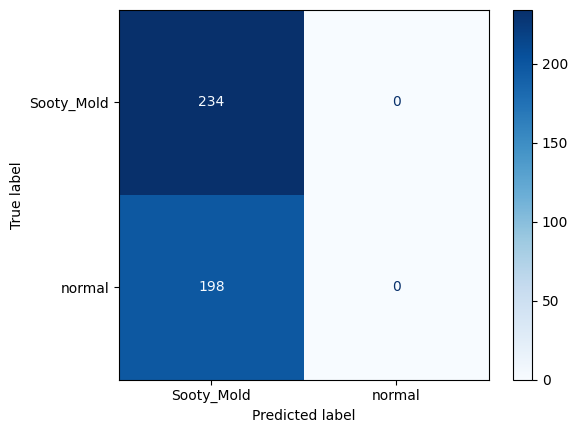

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

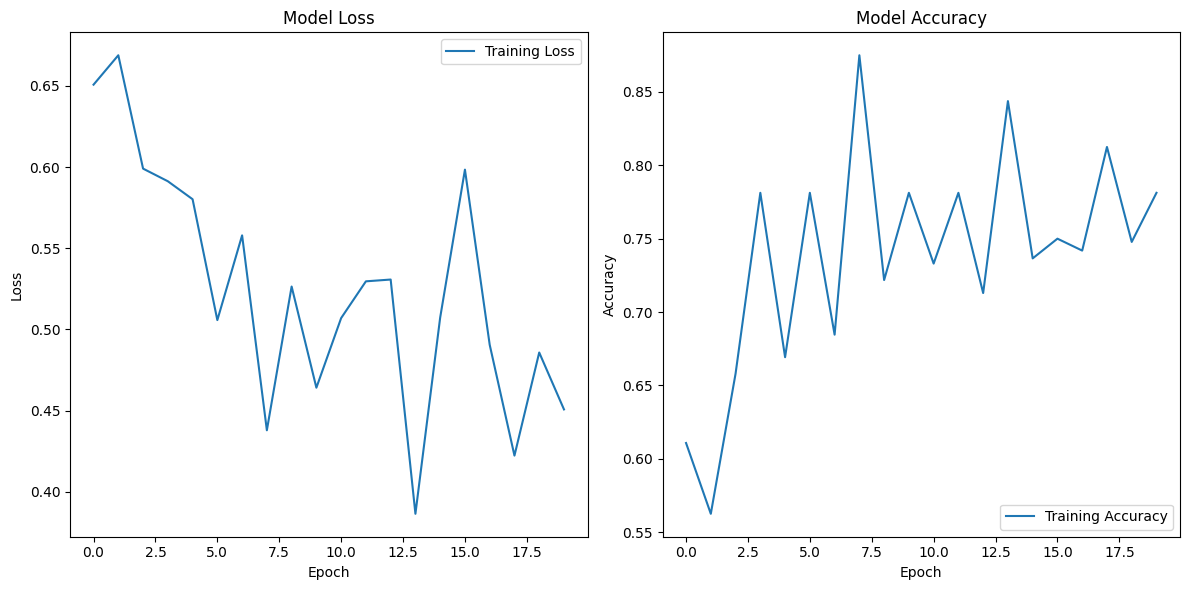

In [4]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

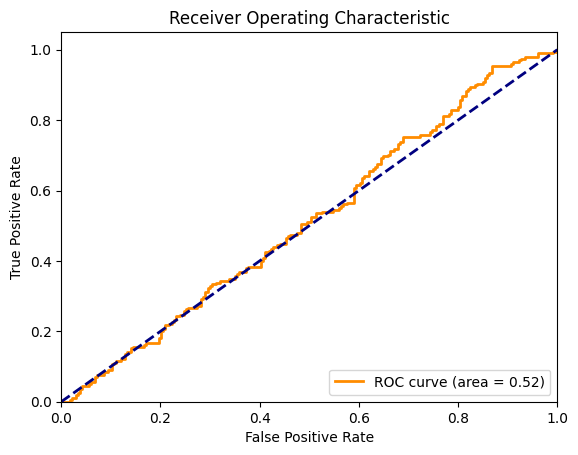

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification with a single output, y_pred contains probabilities for the positive class
y_pred_prob = y_pred  # Use the predicted probabilities directly

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,374,917 (92.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 524,804 (2.00 MB)

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import os

# Paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 224, 224  # Input size for ResNet
batch_size = 32
num_folds = 5  # Number of folds for k-fold cross-validation

# Create a DataFrame with file paths and corresponding labels for k-fold splitting
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # For consistent data during KFold splitting
)

# Get file paths and labels
filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Convert numeric labels to strings (required for class_mode='binary')
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': labels.astype(str)  # Convert the labels to strings
})

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

# Start K-fold Cross-Validation Loop
for train_index, val_index in kfold.split(df):
    print(f'Training fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Load pre-trained ResNet50 model without the top layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Freeze the base model layers to prevent them from being updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Reduce spatial dimensions
    model.add(Dense(128, activation='relu'))  # Dense layer for feature learning
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        steps_per_epoch=train_generator_fold.samples // batch_size,
        epochs=20,  # Adjust as needed
        validation_data=val_generator_fold,
        validation_steps=val_generator_fold.samples // batch_size
    )

    # Evaluate the model on the validation set
    scores = model.evaluate(val_generator_fold)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Found 1725 images belonging to 2 classes.
Training fold 1 ...
Found 1380 validated image filenames belonging to 2 classes.
Found 345 validated image filenames belonging to 2 classes.
Epoch 1/20


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5644 - loss: 0.6951 - val_accuracy: 0.6187 - val_loss: 0.6024
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:02 1s/step - accuracy: 0.5000 - loss: 0.6717

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5000 - loss: 0.6717 - val_accuracy: 0.6000 - val_loss: 0.6434
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6567 - loss: 0.6065 - val_accuracy: 0.6844 - val_loss: 0.5507
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6562 - loss: 0.5696 - val_accuracy: 0.9200 - val_loss: 0.5557
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6781 - loss: 0.5777 - val_accuracy: 0.7656 - val_loss: 0.5343
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6875 - loss: 0.5924 - val_accuracy: 0.8400 - val_loss: 0.4825
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6843 - loss: 0.5610 - val_accuracy: 0.7875 - val_loss: 0.5056
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6875 - loss: 0.5584 - val_accuracy: 0.6000 - val_loss: 0.5949
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7264 - loss: 0.5308 - val_accuracy: 0.7781 - val_loss: 0.4825

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5251 - loss: 0.7475 - val_accuracy: 0.6438 - val_loss: 0.6075
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6875 - loss: 0.6273

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6875 - loss: 0.6273 - val_accuracy: 0.6800 - val_loss: 0.5778
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6523 - loss: 0.6051 - val_accuracy: 0.7625 - val_loss: 0.5489
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5312 - loss: 0.6730 - val_accuracy: 0.6800 - val_loss: 0.5817
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6912 - loss: 0.5734 - val_accuracy: 0.7531 - val_loss: 0.5360
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6875 - loss: 0.6193 - val_accuracy: 0.9200 - val_loss: 0.4494
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7055 - loss: 0.5496 - val_accuracy: 0.7031 - val_loss: 0.5153
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7188 - loss: 0.5493 - val_accuracy: 0.8000 - val_loss: 0.4271
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7167 - loss: 0.5183 - val_accuracy: 0.7281 - val_loss: 0.4945

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5953 - loss: 0.6947 - val_accuracy: 0.6906 - val_loss: 0.5824
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8438 - loss: 0.5244

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8438 - loss: 0.5244 - val_accuracy: 0.6000 - val_loss: 0.6124
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7169 - loss: 0.5681 - val_accuracy: 0.7188 - val_loss: 0.5363
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5938 - loss: 0.5867 - val_accuracy: 0.6000 - val_loss: 0.6578
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6826 - loss: 0.5678 - val_accuracy: 0.7375 - val_loss: 0.5213
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5625 - loss: 0.5811 - val_accuracy: 0.8400 - val_loss: 0.4789
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7055 - loss: 0.5386 - val_accuracy: 0.6844 - val_loss: 0.5419
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8125 - loss: 0.4558 - val_accuracy: 0.8800 - val_loss: 0.4066
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7057 - loss: 0.5414 - val_accuracy: 0.7375 - val_loss: 0.5183

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5416 - loss: 0.7004 - val_accuracy: 0.6187 - val_loss: 0.6158
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:07 2s/step - accuracy: 0.5000 - loss: 0.7370

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5000 - loss: 0.7370 - val_accuracy: 0.6800 - val_loss: 0.6010
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6537 - loss: 0.5975 - val_accuracy: 0.6687 - val_loss: 0.6010
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7188 - loss: 0.5349 - val_accuracy: 0.8000 - val_loss: 0.5295
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6824 - loss: 0.5732 - val_accuracy: 0.6375 - val_loss: 0.5920
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5625 - loss: 0.7330 - val_accuracy: 0.7600 - val_loss: 0.5276
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7327 - loss: 0.5246 - val_accuracy: 0.6656 - val_loss: 0.5384
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6562 - loss: 0.5163 - val_accuracy: 0.7200 - val_loss: 0.6374
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7315 - loss: 0.5008 - val_accuracy: 0.7094 - val_loss: 0.5530

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5769 - loss: 0.6789 - val_accuracy: 0.5844 - val_loss: 0.6324
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:05 2s/step - accuracy: 0.4375 - loss: 0.7062

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4375 - loss: 0.7062 - val_accuracy: 0.6800 - val_loss: 0.6694
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6731 - loss: 0.5810 - val_accuracy: 0.6719 - val_loss: 0.5630
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7812 - loss: 0.5450 - val_accuracy: 0.8000 - val_loss: 0.4958
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7160 - loss: 0.5305 - val_accuracy: 0.7188 - val_loss: 0.5422
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7500 - loss: 0.5023 - val_accuracy: 0.6800 - val_loss: 0.5477
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.7291 - loss: 0.5244 - val_accuracy: 0.6406 - val_loss: 0.6138
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5938 - loss: 0.6086 - val_accuracy: 0.6400 - val_loss: 0.5377
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7201 - loss: 0.5371 - val_accuracy: 0.6969 - val_loss: 0.56

14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step


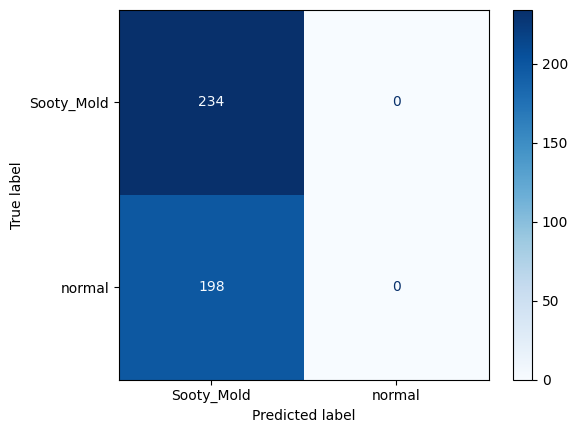

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

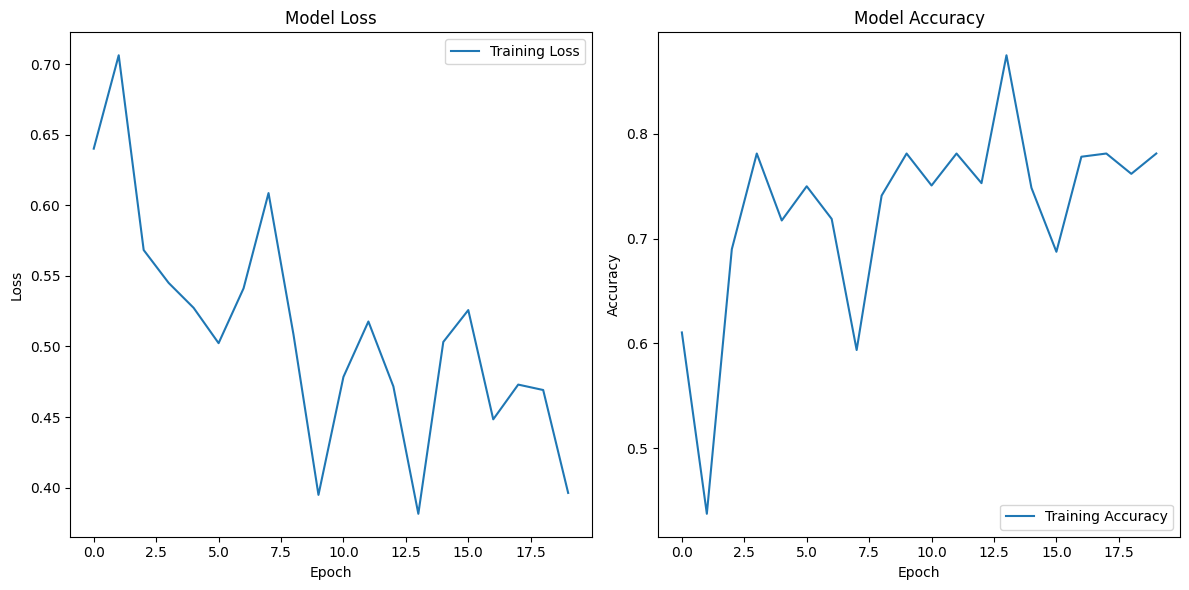

In [11]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

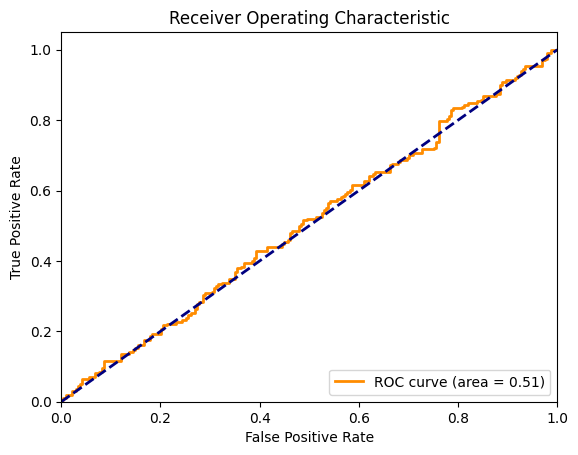

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification with a single output, y_pred contains probabilities for the positive class
y_pred_prob = y_pred  # Use the predicted probabilities directly

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [13]:
# 50 EPOCHS

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # You can choose other ResNet variants like ResNet101, etc.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

# paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 224, 224 # Common input size for ResNet
batch_size = 32

# Create data generators with data augmentation for training and rescaling for testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and test data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model Building

# Load pre-trained ResNet50 model without the top (classification) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) # Reduce spatial dimensions
model.add(Dense(128, activation='relu')) # Add a dense layer for feature learning
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Model Compilation and Training

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs=50, # Adjust as needed
    validation_data=test_generator,
    validation_steps = test_generator.samples // batch_size
)

# Model Evaluation

loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Epoch 1/50


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5404 - loss: 0.6867 - val_accuracy: 0.5673 - val_loss: 0.6498
Epoch 2/50
 1/53 ━━━━━━━━━━━━━━━━━━━━ 1:14 1s/step - accuracy: 0.6875 - loss: 0.5875

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - loss: 0.5875 - val_accuracy: 0.4375 - val_loss: 0.7263
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6773 - loss: 0.6006 - val_accuracy: 0.7524 - val_loss: 0.5363
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7812 - loss: 0.5707 - val_accuracy: 0.5000 - val_loss: 0.7532
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6998 - loss: 0.5551 - val_accuracy: 0.7188 - val_loss: 0.5218
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6562 - loss: 0.5740 - val_accuracy: 0.8750 - val_loss: 0.3436
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7159 - loss: 0.5453 - val_accuracy: 0.7764 - val_loss: 0.5031
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7500 - loss: 0.5146 - val_accuracy: 0.6875 - val_loss: 0.4853
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6729 - loss: 0.5830 - val_accuracy: 0.6995 - val_loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step


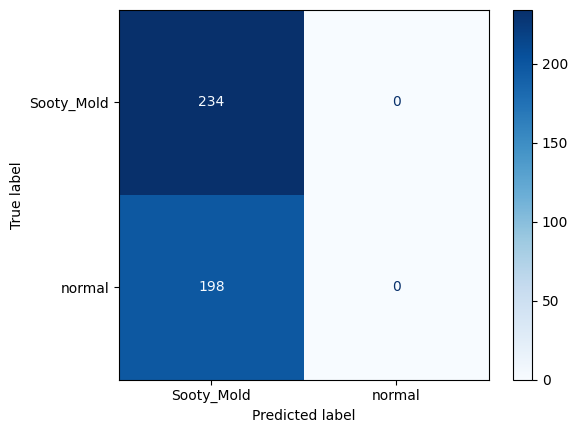

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

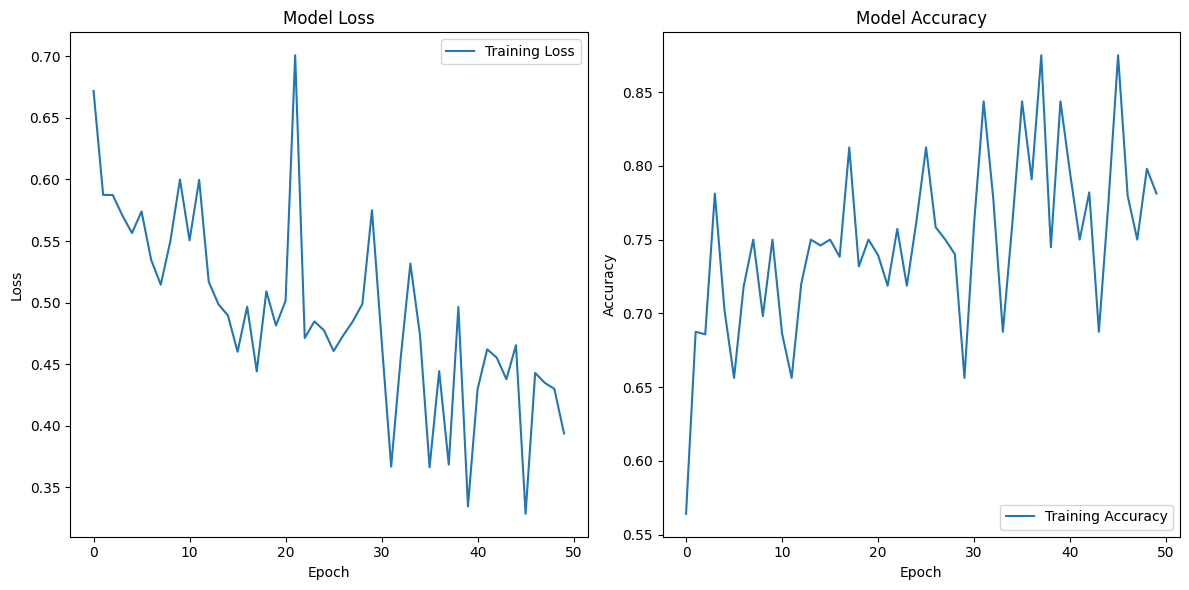

In [4]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

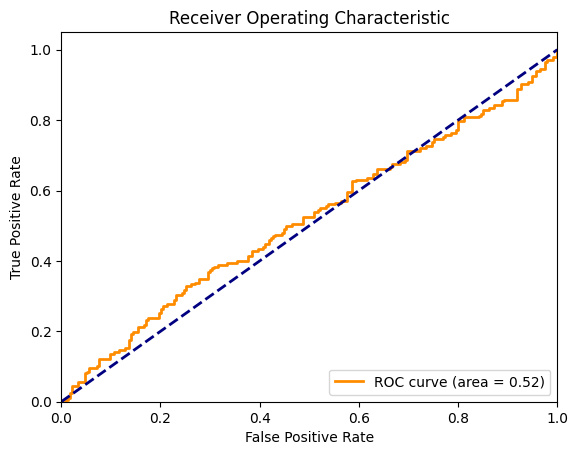

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification with a single output, y_pred contains probabilities for the positive class
y_pred_prob = y_pred  # Use the predicted probabilities directly

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import os

# Paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 224, 224  # Input size for ResNet
batch_size = 32
num_folds = 5  # Number of folds for k-fold cross-validation

# Create a DataFrame with file paths and corresponding labels for k-fold splitting
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # For consistent data during KFold splitting
)

# Get file paths and labels
filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Convert numeric labels to strings (required for class_mode='binary')
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': labels.astype(str)  # Convert the labels to strings
})

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

# Start K-fold Cross-Validation Loop
for train_index, val_index in kfold.split(df):
    print(f'Training fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Load pre-trained ResNet50 model without the top layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Freeze the base model layers to prevent them from being updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Reduce spatial dimensions
    model.add(Dense(128, activation='relu'))  # Dense layer for feature learning
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        steps_per_epoch=train_generator_fold.samples // batch_size,
        epochs=50,  # Adjust as needed
        validation_data=val_generator_fold,
        validation_steps=val_generator_fold.samples // batch_size
    )

    # Evaluate the model on the validation set
    scores = model.evaluate(val_generator_fold)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Found 1725 images belonging to 2 classes.
Training fold 1 ...
Found 1380 validated image filenames belonging to 2 classes.
Found 345 validated image filenames belonging to 2 classes.
Epoch 1/50


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.5548 - loss: 0.6938 - val_accuracy: 0.6250 - val_loss: 0.5948
Epoch 2/50
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:54 3s/step - accuracy: 0.6562 - loss: 0.5467

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6562 - loss: 0.5467 - val_accuracy: 0.7200 - val_loss: 0.5331
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.6762 - loss: 0.5920 - val_accuracy: 0.7375 - val_loss: 0.5546
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6562 - loss: 0.5746 - val_accuracy: 0.6800 - val_loss: 0.5882
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.7307 - loss: 0.5328 - val_accuracy: 0.5750 - val_loss: 0.6577
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5000 - loss: 0.7187 - val_accuracy: 0.6000 - val_loss: 0.6198
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6962 - loss: 0.5449 - val_accuracy: 0.7188 - val_loss: 0.4968
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6562 - loss: 0.4814 - val_accuracy: 0.6800 - val_loss: 0.5116
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7522 - loss: 0.4948 - val_accuracy: 0.6562 - val_loss: 0.

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5541 - loss: 0.7147 - val_accuracy: 0.6250 - val_loss: 0.6199
Epoch 2/50
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:54 3s/step - accuracy: 0.5000 - loss: 0.6540

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5000 - loss: 0.6540 - val_accuracy: 0.5600 - val_loss: 0.6149
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.6718 - loss: 0.6053 - val_accuracy: 0.7656 - val_loss: 0.5356
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8750 - loss: 0.4853 - val_accuracy: 0.7600 - val_loss: 0.5197
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.6829 - loss: 0.5829 - val_accuracy: 0.7656 - val_loss: 0.5060
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7500 - loss: 0.5190 - val_accuracy: 0.8000 - val_loss: 0.5381
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.6987 - loss: 0.5388 - val_accuracy: 0.7937 - val_loss: 0.4846
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6875 - loss: 0.5587 - val_accuracy: 0.6400 - val_loss: 0.4841
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.7449 - loss: 0.5071 - val_accuracy: 0.7312 - val_loss: 0.

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.5866 - loss: 0.6815 - val_accuracy: 0.6438 - val_loss: 0.5921
Epoch 2/50
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:55 3s/step - accuracy: 0.5938 - loss: 0.6309

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5938 - loss: 0.6309 - val_accuracy: 0.7200 - val_loss: 0.4992
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6484 - loss: 0.6055 - val_accuracy: 0.7281 - val_loss: 0.5380
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7500 - loss: 0.5546 - val_accuracy: 0.6800 - val_loss: 0.5588
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7002 - loss: 0.5550 - val_accuracy: 0.7469 - val_loss: 0.5041
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8125 - loss: 0.5000 - val_accuracy: 0.6000 - val_loss: 0.6052
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.7241 - loss: 0.5167 - val_accuracy: 0.7281 - val_loss: 0.5110
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7500 - loss: 0.5763 - val_accuracy: 0.8000 - val_loss: 0.4878
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6751 - loss: 0.5374 - val_accuracy: 0.6812 - val_loss: 0.

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.5406 - loss: 0.7397 - val_accuracy: 0.6562 - val_loss: 0.6040
Epoch 2/50
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:23 2s/step - accuracy: 0.5938 - loss: 0.6421

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5938 - loss: 0.6421 - val_accuracy: 0.4800 - val_loss: 0.6292
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.6666 - loss: 0.5960 - val_accuracy: 0.7156 - val_loss: 0.5728
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6875 - loss: 0.5974 - val_accuracy: 0.8400 - val_loss: 0.5381
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.7161 - loss: 0.5432 - val_accuracy: 0.6812 - val_loss: 0.5401
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6875 - loss: 0.5791 - val_accuracy: 0.7600 - val_loss: 0.5466
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.7209 - loss: 0.5196 - val_accuracy: 0.6281 - val_loss: 0.6257
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6250 - loss: 0.5768 - val_accuracy: 0.6800 - val_loss: 0.6265
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.6849 - loss: 0.5437 - val_accuracy: 0.7031 - val_loss: 0.

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.5928 - loss: 0.6746 - val_accuracy: 0.6938 - val_loss: 0.6013
Epoch 2/50
 1/43 ━━━━━━━━━━━━━━━━━━━━ 2:03 3s/step - accuracy: 0.9375 - loss: 0.5574

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9375 - loss: 0.5574 - val_accuracy: 0.5200 - val_loss: 0.7171
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.6347 - loss: 0.5985 - val_accuracy: 0.7000 - val_loss: 0.5797
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6250 - loss: 0.5883 - val_accuracy: 0.6800 - val_loss: 0.5518
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.7259 - loss: 0.5346 - val_accuracy: 0.7125 - val_loss: 0.5492
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7188 - loss: 0.5388 - val_accuracy: 0.5600 - val_loss: 0.6285
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.7457 - loss: 0.5064 - val_accuracy: 0.6344 - val_loss: 0.6204
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.7188 - loss: 0.5570 - val_accuracy: 0.7600 - val_loss: 0.4468
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.7034 - loss: 0.5232 - val_accuracy: 0.6938 - val_loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


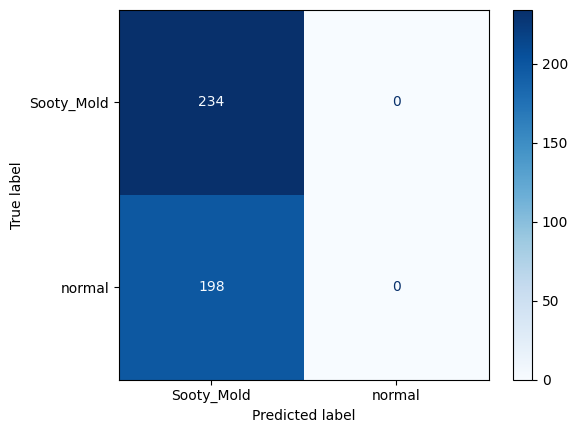

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

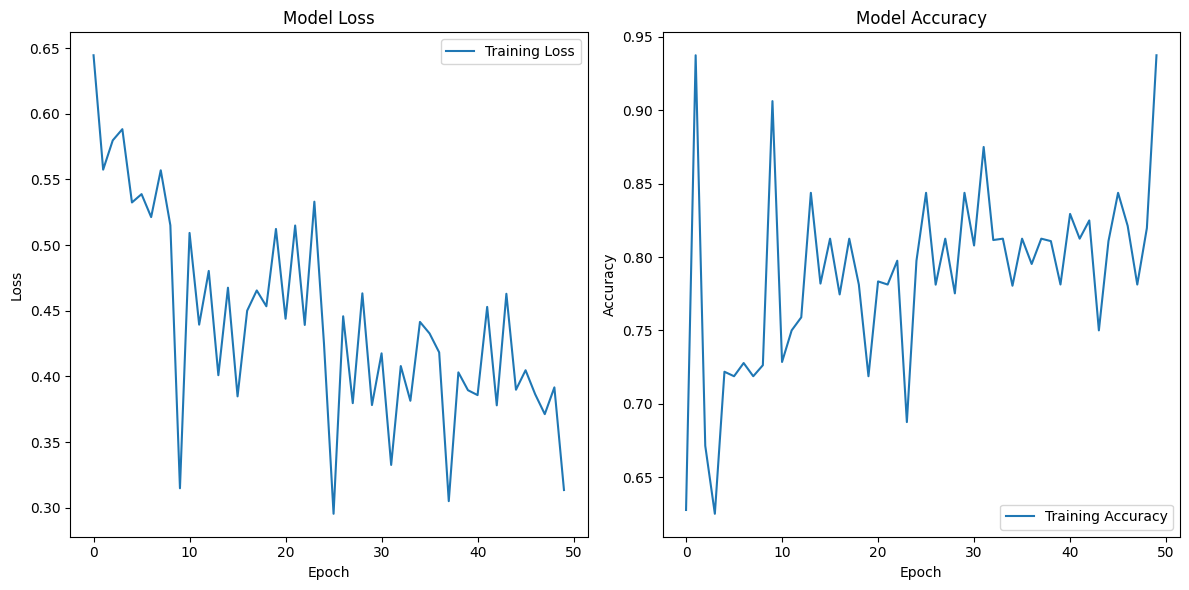

In [8]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

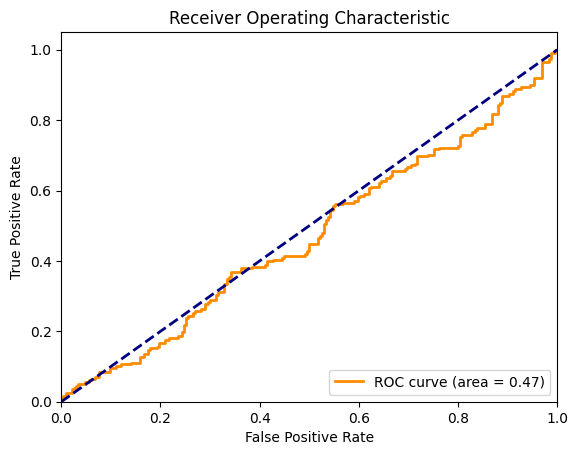

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification with a single output, y_pred contains probabilities for the positive class
y_pred_prob = y_pred  # Use the predicted probabilities directly

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
